In [ ]:
using Images
using JLD
#dir=Dates.format(now(), "yyyy-mm-dd HH:MM:SS")
dir=rand()


@load("grid.jld")

n_grid=151
T=1.9
J=1.0
L=1000000
E_steps=1000000*100

include("equilibration.jl")
include("production.jl")


grid,steps=Equilibration(n_grid,T,J,E_steps)
correlation = Array{Float64}(11,size(1:convert(Int64,ceil(n_grid/2))-1)[1])
for r in 1:convert(Int64,ceil(n_grid/2))-1
    gridpr,corr=Production(n_grid,T,J,L,grid,r)
    correlation[:,r]=corr
end
correlation=transpose(correlation)
# plot(x=convert(Array,1:convert(Int64,ceil(n_grid/2))-2),y=correlation[:,5],Geom.point,Geom.line)

if isdefined(Symbol("grid$n_grid")) == true
    file=jldopen("grid.jld","r+")
    delete!(file,"grid$n_grid")
    write(file,"grid$n_grid",grid)
    close(file)
else
    file=jldopen("grid.jld","r+")
    write(file,"grid$n_grid",grid)
    close(file)
end

mkpath("Data/$n_grid/$dir")
fid=open("Data/$n_grid/$dir/r_corrfunc.dat","w")
writecsv(fid, correlation)
close(fid)

save("Data/$n_grid/$dir/grid.png",(grid/2)+0.5)

fid=open("Data/$n_grid/$dir/sys_details.dat","w")
@printf(fid,"%s %s\r\n","Date/Time : ",Dates.format(now(), "yyyy-mm-dd HH:MM:SS"));
@printf(fid,"%s %f\r\n","J=",J);
@printf(fid,"%s %u\r\n","Lattice Size=",n_grid);
@printf(fid,"%s %f\r\n","temperature = ",T);
@printf(fid,"%s %f\r\n","Number of equilibration steps = ",E_steps);
# @printf(fid,"%s %f\r\n","Maximum temperature = ",Tmax);
# @printf(fid,"%s %f\r\n","Increment in temperature = ",Tinc);
# @printf(fid,"%s %u\r\n","No.of Production run = ",P);
@printf(fid,"%s %u\r\n","No.of steps in production run = ",L);
# @printf(fid,"%s\r\n","Data:");
# @printf(fid,"%6s %12s %14s\r\n\r\n","r (distance)","Correlation function","Error");
close(fid)

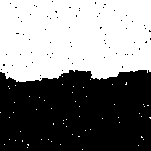

In [20]:
using Colors
Gray.(grid151)

In [19]:
using JLD
@load("grid.jld")

8-element Array{Symbol,1}:
 :grid100
 :grid101
 :grid151
 :grid201
 :grid50 
 :grid55 
 :grid65 
 :grid75 

In [ ]:
using Images
using JLD
#dir=Dates.format(now(), "yyyy-mm-dd HH:MM:SS")
dir=rand()


@load("grid.jld")

n_grid=201
T=0.5
J=1.0
L=1000000
E_steps=1000000*100

include("equilibration.jl")
include("production.jl")


grid,steps=Equilibration(n_grid,T,J,E_steps)
correlation = Array{Float64}(11,size(1:convert(Int64,ceil(n_grid/2))-1)[1])
for r in 1:convert(Int64,ceil(n_grid/2))-1
    gridpr,corr=Production(n_grid,T,J,L,grid,r)
    correlation[:,r]=corr
end
correlation=transpose(correlation)
# plot(x=convert(Array,1:convert(Int64,ceil(n_grid/2))-2),y=correlation[:,5],Geom.point,Geom.line)

if isdefined(Symbol("grid$n_grid")) == true
    file=jldopen("grid.jld","r+")
    delete!(file,"grid$n_grid")
    write(file,"grid$n_grid",grid)
    close(file)
else
    file=jldopen("grid.jld","r+")
    write(file,"grid$n_grid",grid)
    close(file)
end

mkpath("Data/$n_grid/$dir")
fid=open("Data/$n_grid/$dir/r_corrfunc.dat","w")
writecsv(fid, correlation)
close(fid)

save("Data/$n_grid/$dir/grid.png",(grid/2)+0.5)

fid=open("Data/$n_grid/$dir/sys_details.dat","w")
@printf(fid,"%s %s\r\n","Date/Time : ",Dates.format(now(), "yyyy-mm-dd HH:MM:SS"));
@printf(fid,"%s %f\r\n","J=",J);
@printf(fid,"%s %u\r\n","Lattice Size=",n_grid);
@printf(fid,"%s %f\r\n","temperature = ",T);
@printf(fid,"%s %f\r\n","Number of equilibration steps = ",E_steps);
# @printf(fid,"%s %f\r\n","Maximum temperature = ",Tmax);
# @printf(fid,"%s %f\r\n","Increment in temperature = ",Tinc);
# @printf(fid,"%s %u\r\n","No.of Production run = ",P);
@printf(fid,"%s %u\r\n","No.of steps in production run = ",L);
# @printf(fid,"%s\r\n","Data:");
# @printf(fid,"%6s %12s %14s\r\n\r\n","r (distance)","Correlation function","Error");
close(fid)